# Week 6, Models project

In [82]:
# importing work libraries
import pandas as pd
import numpy as np

import plotly
import dash
import seaborn as sns

import plotly.graph_objects as go
import plotly.express as px

pd.options.display.max_columns = None

### Data overview

In [51]:
df1 = pd.read_csv(r"C:/Users/aciag/ih/Week6_project/data/dutch-energy/Electricity/enexis_electricity_01012010.csv")
df2 = pd.read_csv(r"C:/Users/aciag/ih/Week6_project/data/dutch-energy/Electricity/liander_electricity_01012010.csv")
df3 = pd.read_csv(r"C:/Users/aciag/ih/Week6_project/data/dutch-energy/Electricity/stedin_electricity_2010.csv")

In [55]:
df3.head()
#print(df3.shape)

net_manager   purchase_area                   street zipcode_from  \
0  8716874000009  Stedin Utrecht  Gijsbrecht van Amstelln       1181EJ   
1  8716874000009  Stedin Utrecht            Rembrandtlaan       1231AC   
2  8716874000009  Stedin Utrecht            Rembrandtlaan       1231AD   
3  8716874000009  Stedin Utrecht            Jan Steenlaan       1231AE   
4  8716874000009  Stedin Utrecht      Pieter de Hooghlaan       1231AG   

  zipcode_to        city  num_connections  delivery_perc  \
0     1231AB  AMSTELVEEN               32          100.0   
1     1231AC  LOOSDRECHT               17          100.0   
2     1231AD  LOOSDRECHT               17          100.0   
3     1231AE  LOOSDRECHT               20          100.0   
4     1231AG  LOOSDRECHT               17          100.0   

   perc_of_active_connections  type_conn_perc type_of_connection  \
0                       93.75              78               3x25   
1                      100.00              41               1x25   
2                      100.00              41               3x25   
3                      100.00              45               1x25   
4                      100.00              71               1x25   

   annual_consume  annual_consume_lowtarif_perc  smartmeter_perc  
0            5948                         81.25              0.0  
1            3467                         76.47              0.0  
2            3880                         64.71              0.0  
3            4699                         85.00              0.0  
4            4039                         64.71              0.0

In [56]:
df2.head()
#print(df2.shape)

net_manager purchase_area             street zipcode_from zipcode_to  \
0  Liander N.V. (NW)    Liander NW       Rijksweg A44       1000AA     1011AA   
1  Liander N.V. (NW)    Liander NW      De Ruyterkade       1011AB     1011AB   
2  Liander N.V. (NW)    Liander NW      De Ruyterkade       1011AC     1011AC   
3  Liander N.V. (NW)    Liander NW     Oosterdokskade       1011AD     1011AD   
4  Liander N.V. (NW)    Liander NW  Oosterdokskade AB       1011AE     1011AE   

           city  num_connections  delivery_perc  perc_of_active_connections  \
0  NIEUW VENNEP               15          100.0                       73.33   
1     AMSTERDAM               24          100.0                       79.17   
2     AMSTERDAM               31          100.0                       77.42   
3     AMSTERDAM               21          100.0                       38.10   
4     AMSTERDAM               15          100.0                       40.00   

   type_conn_perc type_of_connection  annual_consume  \
0              47               3x25           11420   
1              50               3x25           15289   
2              58               3x25           12576   
3              52               3x25            4395   
4              80               3x25            3373   

   annual_consume_lowtarif_perc  smartmeter_perc  
0                         46.67              0.0  
1                         37.50              0.0  
2                         16.13              0.0  
3                         47.62              0.0  
4                         33.33              0.0

In [57]:
df1.head()
#print(df1.shape)

net_manager purchase_area     street zipcode_from zipcode_to       city  \
0  Enexis B.V.        ENEXIS    Sasdijk       4251AB     4251AB  WERKENDAM   
1  Enexis B.V.        ENEXIS    Sasdijk       4251AC     4251AC  WERKENDAM   
2  Enexis B.V.        ENEXIS    Sasdijk       4251AD     4251AD  WERKENDAM   
3  Enexis B.V.        ENEXIS  Nieuweweg       4251AE     4251AG  WERKENDAM   
4  Enexis B.V.        ENEXIS  Koppenhof       4251AH     4251AH  WERKENDAM   

   delivery_perc  num_connections  perc_of_active_connections  type_conn_perc  \
0            100               16                         100             NaN   
1            100               11                         100             NaN   
2            100               30                         100             NaN   
3            100               21                         100             NaN   
4            100               12                         100             NaN   

   type_of_connection  annual_consume  annual_consume_lowtarif_perc  \
0                 NaN            4282                            25   
1                 NaN            5113                            10   
2                 NaN            4809                            34   
3                 NaN            5015                            44   
4                 NaN            3074                            22   

   smartmeter_perc  
0              0.0  
1              0.0  
2              0.0  
3              0.0  
4              0.0

In [27]:
print("Rows:", df1.shape[0])
print("Columns:", df1.shape[1])
print("Features: \n", df1.columns.to_list())
print("\nMissing values: \n", df1.isna().sum())
print("\nUnique values:\n", df1.nunique())

Rows: 107512
Columns: 14
Features: 
 ['net_manager', 'purchase_area', 'street', 'zipcode_from', 'zipcode_to', 'city', 'delivery_perc', 'num_connections', 'perc_of_active_connections', 'type_conn_perc', 'type_of_connection', 'annual_consume', 'annual_consume_lowtarif_perc', 'smartmeter_perc']

Missing values: 
 net_manager                          0
purchase_area                        0
street                               0
zipcode_from                         0
zipcode_to                           0
city                                 0
delivery_perc                        0
num_connections                      0
perc_of_active_connections           0
type_conn_perc                  107512
type_of_connection              107512
annual_consume                       0
annual_consume_lowtarif_perc         0
smartmeter_perc                      0
dtype: int64

Unique values:
 net_manager                          1
purchase_area                        1
street                           3

## Data manipulation

In [34]:
# merging data from 3 different companies for the same year into one

dft=pd.concat([df1,df2,df3])

In [36]:
dft.shape

(323140, 14)

In [37]:
print("Rows:", dft.shape[0])
print("Columns:", dft.shape[1])
print("Features: \n", dft.columns.to_list())
print("\nMissing values: \n", dft.isna().sum())
print("\nUnique values:\n", dft.nunique())

Rows: 323140
Columns: 14
Features: 
 ['net_manager', 'purchase_area', 'street', 'zipcode_from', 'zipcode_to', 'city', 'delivery_perc', 'num_connections', 'perc_of_active_connections', 'type_conn_perc', 'type_of_connection', 'annual_consume', 'annual_consume_lowtarif_perc', 'smartmeter_perc']

Missing values: 
 net_manager                          0
purchase_area                    73796
street                               0
zipcode_from                         0
zipcode_to                           0
city                                 0
delivery_perc                        0
num_connections                      0
perc_of_active_connections           0
type_conn_perc                  107512
type_of_connection              107512
annual_consume                       0
annual_consume_lowtarif_perc         0
smartmeter_perc                      0
dtype: int64

Unique values:
 net_manager                         11
purchase_area                        9
street                           9

In [39]:
#dropping columns with low number of unique values
dft1=dft.drop(["purchase_area","type_conn_perc","type_of_connection"],axis=1)

In [44]:
#dropping location-related columns
dft1=dft1.drop(["net_manager","street","zipcode_from","zipcode_to","city"],axis=1)

In [45]:
dft1.head()

delivery_perc  num_connections  perc_of_active_connections  annual_consume  \
0          100.0               16                       100.0            4282   
1          100.0               11                       100.0            5113   
2          100.0               30                       100.0            4809   
3          100.0               21                       100.0            5015   
4          100.0               12                       100.0            3074   

   annual_consume_lowtarif_perc  smartmeter_perc  
0                          25.0              0.0  
1                          10.0              0.0  
2                          34.0              0.0  
3                          44.0              0.0  
4                          22.0              0.0

In [50]:
dft1.smartmeter_perc.value_counts()

0.00      295236
4.00        1003
5.00         881
5.26         798
100.00       797
           ...  
59.65          1
97.44          1
89.82          1
29.20          1
92.94          1
Name: smartmeter_perc, Length: 1294, dtype: int64

In [60]:
# data viz
fig = go.Figure(data=[go.Histogram(x=dft1.annual_consume)])

fig.update_layout(
    title_text='Annual energy consumption',
    xaxis_title_text='x ax',
    yaxis_title_text='y ax'
)

fig.show()

In [61]:
dft1.corr()

delivery_perc  num_connections  \
delivery_perc                      1.000000        -0.011872   
num_connections                   -0.011872         1.000000   
perc_of_active_connections         0.005613        -0.072900   
annual_consume                    -0.002894        -0.022033   
annual_consume_lowtarif_perc      -0.094499         0.044854   
smartmeter_perc                   -0.018823         0.049148   

                              perc_of_active_connections  annual_consume  \
delivery_perc                                   0.005613       -0.002894   
num_connections                                -0.072900       -0.022033   
perc_of_active_connections                      1.000000       -0.118042   
annual_consume                                 -0.118042        1.000000   
annual_consume_lowtarif_perc                    0.082479        0.146351   
smartmeter_perc                                 0.008894       -0.018519   

                              annual_consume_lowtarif_perc  smartmeter_perc  
delivery_perc                                    -0.094499        -0.018823  
num_connections                                   0.044854         0.049148  
perc_of_active_connections                        0.082479         0.008894  
annual_consume                                    0.146351        -0.018519  
annual_consume_lowtarif_perc                      1.000000         0.139752  
smartmeter_perc                                   0.139752         1.000000

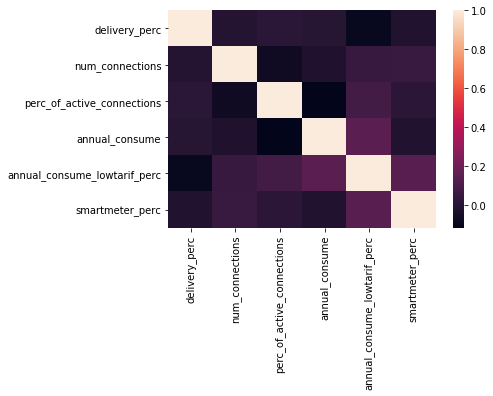

In [62]:
sns.heatmap(dft1.corr())

In [69]:
dft.describe()

delivery_perc  num_connections  perc_of_active_connections  \
count  323140.000000    323140.000000               323140.000000   
mean       99.787490        22.852881                   97.918346   
std         1.881237        14.607627                    7.913300   
min         0.000000        10.000000                    0.000000   
25%       100.000000        15.000000                  100.000000   
50%       100.000000        20.000000                  100.000000   
75%       100.000000        26.000000                  100.000000   
max       100.000000      1088.000000                  100.000000   

       type_conn_perc  annual_consume  annual_consume_lowtarif_perc  \
count   215628.000000   323140.000000                 323140.000000   
mean        88.328107     4693.466587                     43.533856   
std         16.142981     3634.353077                     30.691470   
min         17.000000        0.000000                      0.000000   
25%         83.000000     2875.000000                     18.750000   
50%         95.000000     3761.000000                     38.460000   
75%        100.000000     4974.000000                     63.640000   
max        100.000000   105830.000000                    100.000000   

       smartmeter_perc  
count    323140.000000  
mean          1.913580  
std          11.083122  
min           0.000000  
25%           0.000000  
50%           0.000000  
75%           0.000000  
max         100.000000

In [70]:
## Data processing

In [72]:
# Linear regression attemps

In [73]:
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
from sklearn import datasets

import statsmodels.api as sm
from statsmodels.tools.tools import add_constant

In [77]:
y = dft1['annual_consume']
X = dft1.drop('annual_consume', axis=1)

In [78]:
X=add_constant(X)

In [79]:
model=sm.OLS(y,X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         annual_consume   R-squared:                       0.042
Model:                            OLS   Adj. R-squared:                  0.042
Method:                 Least Squares   F-statistic:                     2803.
Date:                Fri, 21 Feb 2020   Prob (F-statistic):               0.00
Time:                        15:51:03   Log-Likelihood:            -3.1008e+06
No. Observations:              323140   AIC:                         6.202e+06
Df Residuals:                  323134   BIC:                         6.202e+06
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                         7727.9662    342.733     22.548      0.000    7056.219    8399.714
delivery_perc                   23.8497      3.343      7.135      0.000      17.298      30.401
num_connections                 -9.2568      0.431    -21.497      0.000     -10.101      -8.413
perc_of_active_connections     -61.6077      0.796    -77.387      0.000     -63.168     -60.047
annual_consume_lowtarif_perc    19.6118      0.208     94.393      0.000      19.205      20.019
smartmeter_perc                -12.5953      0.571    -22.063      0.000     -13.714     -11.476
==============================================================================
Omnibus:                   276596.734   Durbin-Watson:                   1.063
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         10721585.309
Skew:                           3.996   Prob(JB):                         0.00
Kurtosis:                      30.063   Cond. No.                     8.14e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.14e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# MMA db

In [174]:
df5 = pd.read_csv(r"C:/Users/aciag/ih/Week6_project/data/ufcdata/preprocessed_data.csv")

In [175]:
df5.head()

Winner  title_bout  no_of_rounds  B_current_lose_streak  \
0    Red        True             5                    0.0   
1    Red        True             5                    0.0   
2    Red       False             3                    0.0   
3   Blue       False             3                    0.0   
4   Blue       False             3                    0.0   

   B_current_win_streak  B_draw  B_avg_BODY_att  B_avg_BODY_landed  \
0                   4.0     0.0        9.200000           6.000000   
1                   3.0     0.0       14.600000           9.100000   
2                   3.0     0.0       15.354839          11.322581   
3                   4.0     0.0       17.000000          14.000000   
4                   1.0     0.0       17.000000          14.500000   

   B_avg_CLINCH_att  B_avg_CLINCH_landed  B_avg_DISTANCE_att  \
0          0.200000             0.000000           62.600000   
1         11.800000             7.300000          124.700000   
2          6.741935             4.387097           84.741935   
3         13.750000            11.000000          109.500000   
4          2.500000             2.000000          201.000000   

   B_avg_DISTANCE_landed  B_avg_GROUND_att  B_avg_GROUND_landed  \
0              20.600000          2.600000             2.000000   
1              42.100000          2.400000             1.900000   
2              38.580645          5.516129             3.806452   
3              48.750000         13.000000            10.500000   
4              59.500000          0.000000             0.000000   

   B_avg_HEAD_att  B_avg_HEAD_landed  B_avg_KD  B_avg_LEG_att  \
0       48.600000          11.200000  0.800000            7.6   
1      112.000000          32.000000  0.000000           12.3   
2       67.645161          23.258065  0.645161           14.0   
3      116.250000          53.750000  0.500000            3.0   
4      184.500000          45.000000  0.000000            2.0   

   B_avg_LEG_landed  B_avg_PASS  B_avg_REV  B_avg_SIG_STR_att  \
0          5.400000    0.400000   0.000000              65.40   
1         10.200000    0.800000   0.000000             138.90   
2         12.193548    0.935484   0.096774              97.00   
3          2.500000    0.500000   0.250000             136.25   
4          2.000000    0.000000   0.000000             203.50   

   B_avg_SIG_STR_landed  B_avg_SIG_STR_pct  B_avg_SUB_ATT  B_avg_TD_att  \
0             22.600000           0.466000       0.400000       0.80000   
1             51.300000           0.399000       0.700000       1.00000   
2             46.774194           0.496129       0.354839       2.16129   
3             70.250000           0.550000       0.250000       2.50000   
4             61.500000           0.310000       0.000000       0.00000   

   B_avg_TD_landed  B_avg_TD_pct  B_avg_TOTAL_STR_att  B_avg_TOTAL_STR_landed  \
0         0.200000      0.100000            66.400000               23.600000   
1         0.500000      0.225000           158.700000               69.600000   
2         0.677419      0.295484           103.709677               52.548387   
3         1.250000      0.287500           154.750000               86.750000   
4         0.000000      0.000000           204.000000               62.000000   

   B_longest_win_streak  B_losses  B_avg_opp_BODY_att  B_avg_opp_BODY_landed  \
0                   4.0       1.0            6.400000               4.000000   
1                   3.0       6.0           13.000000               9.300000   
2                   8.0       8.0           17.903226              11.870968   
3                   4.0       0.0           12.250000               6.000000   
4                   1.0       1.0           42.500000              23.500000   

   B_avg_opp_CLINCH_att  B_avg_opp_CLINCH_landed  B_avg_opp_DISTANCE_att  \
0              1.000000                  0.60000               51.200000   
1             12.800000                  9.60000              101.700000 

In [176]:
df4 = pd.read_csv(r"C:/Users/aciag/ih/Week6_project/data/ufcdata/data.csv")

In [177]:
df4.head()

R_fighter       B_fighter          Referee        date  \
0          Henry Cejudo   Marlon Moraes     Marc Goddard  2019-06-08   
1  Valentina Shevchenko     Jessica Eye  Robert Madrigal  2019-06-08   
2         Tony Ferguson  Donald Cerrone  Dan Miragliotta  2019-06-08   
3         Jimmie Rivera        Petr Yan  Kevin MacDonald  2019-06-08   
4           Tai Tuivasa   Blagoy Ivanov  Dan Miragliotta  2019-06-08   

                 location Winner  title_bout       weight_class  no_of_rounds  \
0  Chicago, Illinois, USA    Red        True       Bantamweight             5   
1  Chicago, Illinois, USA    Red        True  Women's Flyweight             5   
2  Chicago, Illinois, USA    Red       False        Lightweight             3   
3  Chicago, Illinois, USA   Blue       False       Bantamweight             3   
4  Chicago, Illinois, USA   Blue       False        Heavyweight             3   

   B_current_lose_streak  B_current_win_streak  B_draw  B_avg_BODY_att  \
0                    0.0                   4.0     0.0        9.200000   
1                    0.0                   3.0     0.0       14.600000   
2                    0.0                   3.0     0.0       15.354839   
3                    0.0                   4.0     0.0       17.000000   
4                    0.0                   1.0     0.0       17.000000   

   B_avg_BODY_landed  B_avg_CLINCH_att  B_avg_CLINCH_landed  \
0           6.000000          0.200000             0.000000   
1           9.100000         11.800000             7.300000   
2          11.322581          6.741935             4.387097   
3          14.000000         13.750000            11.000000   
4          14.500000          2.500000             2.000000   

   B_avg_DISTANCE_att  B_avg_DISTANCE_landed  B_avg_GROUND_att  \
0           62.600000              20.600000          2.600000   
1          124.700000              42.100000          2.400000   
2           84.741935              38.580645          5.516129   
3          109.500000              48.750000         13.000000   
4          201.000000              59.500000          0.000000   

   B_avg_GROUND_landed  B_avg_HEAD_att  B_avg_HEAD_landed  B_avg_KD  \
0             2.000000       48.600000          11.200000  0.800000   
1             1.900000      112.000000          32.000000  0.000000   
2             3.806452       67.645161          23.258065  0.645161   
3            10.500000      116.250000          53.750000  0.500000   
4             0.000000      184.500000          45.000000  0.000000   

   B_avg_LEG_att  B_avg_LEG_landed  B_avg_PASS  B_avg_REV  B_avg_SIG_STR_att  \
0            7.6          5.400000    0.400000   0.000000              65.40   
1           12.3         10.200000    0.800000   0.000000             138.90   
2           14.0         12.193548    0.935484   0.096774              97.00   
3            3.0          2.500000    0.500000   0.250000             136.25   
4            2.0          2.000000    0.000000   0.000000             203.50   

   B_avg_SIG_STR_landed  B_avg_SIG_STR_pct  B_avg_SUB_ATT  B_avg_TD_att  \
0             22.600000           0.466000       0.400000       0.80000   
1             51.300000           0.399000       0.700000       1.00000   
2             46.774194           0.496129       0.354839       2.16129   
3             70.250000           0.550000       0.250000       2.50000   
4             61.500000           0.310000       0.000000       0.00000   

   B_avg_TD_landed  B_avg_TD_pct  B_avg_TOTAL_STR_att  B_avg_TOTAL_STR_landed  \
0         0.200000      0.100000            66.400000               23.600000   
1         0.500000      0.225000           158.700000               69.600000   
2         0.677419      0.295484           103.709677               52.548387   
3         1.250000      0.287500           154.750000               86.750000   
4         0.000000      0.000000           204.000000               62.000000   

   B_longest_win_streak  B_

In [178]:
df4.shape

(5144, 145)

In [179]:
df4.Winner.value_counts()

Red     3470
Blue    1591
Draw      83
Name: Winner, dtype: int64

In [180]:
# dropping all draw outcomes from the dataset
df4.drop(df4.loc[df4['Winner']=='Draw'].index, inplace=True)

In [181]:
# irrelevant cols
cols = ['R_fighter','B_fighter','Referee','date','location','weight_class']

In [182]:
df4.drop(cols,axis=1,inplace=True)

In [183]:
#dummies for winner col
df4 = pd.get_dummies(data=df4, columns=['Winner','R_Stance','B_Stance','title_bout'], drop_first=True)

In [184]:
df4.describe()

no_of_rounds  B_current_lose_streak  B_current_win_streak  B_draw  \
count   5061.000000            5061.000000           5061.000000  5061.0   
mean       3.119542               0.429955              0.833235     0.0   
std        0.631310               0.730263              1.284542     0.0   
min        1.000000               0.000000              0.000000     0.0   
25%        3.000000               0.000000              0.000000     0.0   
50%        3.000000               0.000000              0.000000     0.0   
75%        3.000000               1.000000              1.000000     0.0   
max        5.000000               6.000000             12.000000     0.0   

       B_avg_BODY_att  B_avg_BODY_landed  B_avg_CLINCH_att  \
count     3820.000000        3820.000000       3820.000000   
mean         8.673227           6.074136          8.235202   
std          7.085295           5.066574          7.596434   
min          0.000000           0.000000          0.000000   
25%          3.500000           2.333333          3.000000   
50%          7.000000           5.000000          6.333333   
75%         12.093182           8.471154         11.400000   
max         49.000000          39.000000         87.000000   

       B_avg_CLINCH_landed  B_avg_DISTANCE_att  B_avg_DISTANCE_landed  \
count          3820.000000         3820.000000            3820.000000   
mean              5.553124           53.129538              19.320007   
std               5.442513           41.272687              15.966421   
min               0.000000            0.000000               0.000000   
25%               2.000000           22.000000               7.666667   
50%               4.200000           44.666667              15.200000   
75%               7.689935           74.255682              27.087500   
max              68.000000          271.000000             130.000000   

       B_avg_GROUND_att  B_avg_GROUND_landed  B_avg_HEAD_att  \
count       3820.000000          3820.000000     3820.000000   
mean           8.744809             5.763323       55.437026   
std            8.753480             5.721710       36.371571   
min            0.000000             0.000000        0.000000   
25%            2.500000             1.666667       29.383333   
50%            6.500000             4.333333       49.000000   
75%           12.166667             8.000000       74.678571   
max           88.000000            47.000000      277.000000   

       B_avg_HEAD_landed     B_avg_KD  B_avg_LEG_att  B_avg_LEG_landed  \
count        3820.000000  3820.000000    3820.000000       3820.000000   
mean           19.811502     0.246851       5.999296          4.750815   
std            13.054187     0.340874       5.810127          4.597766   
min             0.000000     0.000000       0.000000          0.000000   
25%            11.000000     0.000000       2.000000          1.500000   
50%            17.738636     0.111111       4.500000          3.600000   
75%            26.000000     0.400000       8.500000          6.727273   
max           137.000000     5.000000      61.000000         47.000000   

        B_avg_PASS    B_avg_REV  B_avg_SIG_STR_att  B_avg_SIG_STR_landed  \
count  3820.000000  3820.000000        3820.000000           3820.000000   
mean      1.280600     0.169406          70.109549             30.636453   
std       1.443292     0.324222          44.084187             18.745722   
min       0.000000     0.000000           0.000000              0.000000   
25%       0.200000     0.000000          38.482143             17.166667   
50%       1.000000     0.000000          63.000000             28.250000   
75%       1.882353     0.241071          94.133540             40.750000   
max      15.000000     3.000000         299.000000            154.000000   

       B_avg_SIG_STR_pct  B_avg_SUB_ATT  B_avg_TD_att  B_avg_TD_landed  \
count        3820.000000    3820.000000   3820.000000      3820.000000   
mean            0.456448    

In [185]:
df4.isna().sum()

no_of_rounds                0
B_current_lose_streak       0
B_current_win_streak        0
B_draw                      0
B_avg_BODY_att           1241
                         ... 
B_Stance_Orthodox           0
B_Stance_Sideways           0
B_Stance_Southpaw           0
B_Stance_Switch             0
title_bout_True             0
Length: 145, dtype: int64

In [186]:
df4[df4.isna().any(axis=1)]


no_of_rounds  B_current_lose_streak  B_current_win_streak  B_draw  \
11               3                    0.0                   0.0     0.0   
17               3                    0.0                   0.0     0.0   
18               3                    0.0                   0.0     0.0   
22               3                    0.0                   0.0     0.0   
24               3                    0.0                   0.0     0.0   
...            ...                    ...                   ...     ...   
5139             1                    0.0                   1.0     0.0   
5140             1                    0.0                   0.0     0.0   
5141             1                    0.0                   0.0     0.0   
5142             1                    0.0                   0.0     0.0   
5143             1                    0.0                   0.0     0.0   

      B_avg_BODY_att  B_avg_BODY_landed  B_avg_CLINCH_att  \
11               NaN                NaN               NaN   
17               NaN                NaN               NaN   
18               NaN                NaN               NaN   
22               NaN                NaN               NaN   
24               NaN                NaN               NaN   
...              ...                ...               ...   
5139             4.0                3.0               9.0   
5140             NaN                NaN               NaN   
5141             NaN                NaN               NaN   
5142             NaN                NaN               NaN   
5143             NaN                NaN               NaN   

      B_avg_CLINCH_landed  B_avg_DISTANCE_att  B_avg_DISTANCE_landed  \
11                    NaN                 NaN                    NaN   
17                    NaN                 NaN                    NaN   
18                    NaN                 NaN                    NaN   
22                    NaN                 NaN                    NaN   
24                    NaN                 NaN                    NaN   
...                   ...                 ...                    ...   
5139                  4.0                10.0                    4.0   
5140                  NaN                 NaN                    NaN   
5141                  NaN                 NaN                    NaN   
5142                  NaN                 NaN                    NaN   
5143                  NaN                 NaN                    NaN   

      B_avg_GROUND_att  B_avg_GROUND_landed  B_avg_HEAD_att  \
11                 NaN                  NaN             NaN   
17                 NaN                  NaN             NaN   
18                 NaN                  NaN             NaN   
22                 NaN                  NaN             NaN   
24                 NaN                  NaN             NaN   
...                ...                  ...             ...   
5139               8.0                  7.0            23.0   
5140               NaN                  NaN             NaN   
5141               NaN                  NaN             NaN   
5142               NaN                  NaN             NaN   
5143               NaN                  NaN             NaN   

      B_avg_HEAD_landed  B_avg_KD  B_avg_LEG_att  B_avg_LEG_landed  \
11                  NaN       NaN            NaN               NaN   
17                  NaN       NaN            NaN               NaN   
18                  NaN       NaN            NaN               NaN   
22                  NaN       NaN            NaN               NaN   
24                  NaN       NaN            NaN               NaN   
...                 ...       ...            ...               ...   
5139               12.0       2.0            0.0               0.0   
5140                NaN       NaN            NaN               NaN   
5141                NaN       NaN            NaN               NaN   
5142                NaN       NaN            NaN  

In [187]:
df4 = df4.dropna(axis=0, how='any')

In [188]:
df4.isna().sum()

no_of_rounds             0
B_current_lose_streak    0
B_current_win_streak     0
B_draw                   0
B_avg_BODY_att           0
                        ..
B_Stance_Orthodox        0
B_Stance_Sideways        0
B_Stance_Southpaw        0
B_Stance_Switch          0
title_bout_True          0
Length: 145, dtype: int64

In [189]:
y = df4['Winner_Red']
X = df4.drop('Winner_Red', axis=1)

In [190]:
X=add_constant(X)

In [191]:
model=sm.OLS(y,X).fit()
model.summary()

C:\Users\aciag\Anaconda3\lib\site-packages\statsmodels\base\model.py:1362: RuntimeWarning:

invalid value encountered in true_divide

C:\Users\aciag\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:903: RuntimeWarning:

invalid value encountered in greater

C:\Users\aciag\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:903: RuntimeWarning:

invalid value encountered in less

C:\Users\aciag\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1912: RuntimeWarning:

invalid value encountered in less_equal



<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Winner_Red   R-squared:                       0.141
Model:                            OLS   Adj. R-squared:                  0.108
Method:                 Least Squares   F-statistic:                     4.220
Date:                Fri, 21 Feb 2020   Prob (F-statistic):           1.50e-45
Time:                        17:07:26   Log-Likelihood:                -2018.0
No. Observations:                3302   AIC:                             4286.
Df Residuals:                    3177   BIC:                             5049.
Df Model:                         124                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                            1.1561      0.361      3.199      0.001       0.447       1.865
no_of_rounds                    -0.0310      0.020     -1.584      0.113      -0.069       0.007
B_current_lose_streak           -0.0198      0.014     -1.368      0.171      -0.048       0.009
B_current_win_streak            -0.0194      0.009     -2.228      0.026      -0.036      -0.002
B_draw                       -4.371e-15   1.15e-14     -0.380      0.704   -2.69e-14    1.82e-14
B_avg_BODY_att                   0.0049      0.004      1.166      0.244      -0.003       0.013
B_avg_BODY_landed               -0.0105      0.006     -1.876      0.061      -0.022       0.000
B_avg_CLINCH_att                 0.0010      0.004      0.251      0.802      -0.007       0.009
B_avg_CLINCH_landed             -0.0011      0.006     -0.194      0.847      -0.012       0.010
B_avg_DISTANCE_att              -0.0008      0.002     -0.366      0.715      -0.005       0.003
B_avg_DISTANCE_landed           -0.0004      0.003     -0.143      0.886      -0.006       0.006
B_avg_GROUND_att                -0.0037      0.004     -0.991      0.322      -0.011       0.004
B_avg_GROUND_landed              0.0033      0.005      0.608      0.543      -0.007       0.014
B_avg_HEAD_att                   0.0026      0.003      1.003      0.316      -0.003       0.008
B_avg_HEAD_landed               -0.0045      0.004     -1.220      0.223      -0.012       0.003
B_avg_KD                         0.0136      0.028      0.479      0.632      -0.042       0.069
B_avg_LEG_att                   -0.0109      0.006     -1.928      0.054      -0.022       0.000
B_avg_LEG_landed                 0.0168      0.007      2.318      0.021       0.003       0.031
B_avg_PASS                       0.0038      0.009      0.437      0.662      -0.013       0.021
B_avg_REV                       -0.0128      0.031     -0.415      0.678      -0.073       0.048
B_avg_SIG_STR_att               -0.0034      0.003     -1.039      0.299      -0.010       0.003
B_avg_SIG_STR_landed             0.0018      0.004      0.444      0.657      -0.006       0.010
B_avg_SIG_STR_pct               -0.0121      0.102     -0.118      0.906      -0.213       0.189
B_avg_SUB_ATT                    0.0152      0.014      1.056      0.291      -0.013       0.043
B_avg_TD_att                    -0.0170      0.007     -2.613      0.009      -0.030      -0.004
B_avg_TD_landed                 -0.0175      0.016     -1.069      0.285      -0.049       0.015
B_avg_TD_pct                     0.0747      0.048      1.552      0.121      -0.020       0.169
B_avg_TOTAL_STR_att              0.0009      0.004      0.217      0.828      -0.007       0.009
B_avg_TOTAL_STR_landed           0.0012      0.005      0.258      0.796    

In [201]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import auc,confusion_matrix

In [197]:
X_train,X_test,y_train,y_test=train_test_split(df4.drop('Winner_Red',axis=1),
                                              df4.Winner_Red, test_size=1/3, random_state=42)

In [198]:
model1=LogisticRegression()
res1=model1.fit(X_train,y_train)
pred1=model1.predict(X_test)

C:\Users\aciag\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



In [199]:
pd.DataFrame(pred1).head()

0
0  1
1  1
2  1
3  1
4  1

In [202]:
conf1=confusion_matrix(y_test,pred1)
conf1

array([[ 97, 296],
       [ 90, 618]], dtype=int64)